# GalaxyZoo Image DataSet

In [1]:
# Adjust the path parameters to the local catalog location 

dir_image = '/home/hhg/Research/galaxyClassify/catalog/galaxyZoo_kaggle/gz2_images/images'
file_csv = '/home/hhg/Research/galaxyClassify/catalog/galaxyZoo/zoo2/gz2_all_v2.csv'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

#### ------------ Start ------------

## The Galaxy Morphology Catalog

- There are 155,951 galaxies in the catalog.

In [3]:
df = pd.read_csv(file_csv)
df

,galaxyID,label_8,label_7,label_3
0,110939,0,0,0
1,187749,0,0,0
2,162781,0,0,0
3,154143,0,0,0
4,12450,0,0,0
...,...,...,...,...
155946,260790,7,6,2
155947,250189,7,6,2
155948,115591,7,6,2
155949,271627,7,6,2


### Number of Galaxies in each Morphological Category

#### ``'label_8'`` tag system

|   label_8  |  0  |  1  |  2  |  3  |  4  |  5  |  6  |  7  |
| ---------- | --- | --- | --- | --- | --- | --- | --- | --- |
| **Morphology** | Round <br> Elliptical | In-between <br> Elliptical | Cigar-shaped <br> Elliptical | Edge-on <br> Spiral | Barred Spiral | Unbarred Sprial | Irregualr | Merger
| **Ngals** | 33898 | 39200 | 7414 | 16349 | 20407 | 30657 | 5925 | 2101 |

#### ``'label_7'`` tag system

- The ``'label_7'`` system combines the **Irregualr** and the **Merger** classes into a single category.

|   label_7  |  0  |  1  |  2  |  3  |  4  |  5  |  6  |
| ---------- | --- | --- | --- | --- | --- | --- | --- |
| **Morphology** | Round <br> Elliptical | In-between <br> Elliptical | Cigar-shaped <br> Elliptical | Edge-on <br> Spiral | Barred Spiral | Unbarred Sprial | Irregualr <br> (includes Merger) |
| **Ngals** | 33898 | 39200 | 7414 | 16349 | 20407 | 30657 | 8026 |

#### ``'label_3'`` tag system

- The ``'label_3'`` system further simplifies the galaxy morphology into just 3 types : 
    - **Elliptical** (class label 0, 1, 2 in `label_8`)
    - **Spiral** (class label 3, 4, 5 in `label_8`)
    - **Other** (class label 6, 7 in `label_8`)

|     label_3    |      0     |    1   |   2   | 
| -------------- |----------- | ------ | ----- |
| **Morphology** | Elliptical | Spiral | Other |
|    **Ngals**   | 80512 | 67413 | 8026 |

- The above statistics can be viewed with the `groupby` method in `pandas` (as shown below).

In [4]:
df.groupby(['label_8',  'label_7', 'label_3']).size()

label_8  label_7  label_3
0        0        0          33898
1        1        0          39200
2        2        0           7414
3        3        1          16349
4        4        1          20407
5        5        1          30657
6        6        2           5925
7        6        2           2101
dtype: int64

## The GalaxyZoo Image Data

- Image dataset available at [Kaggle galaxy zoo 2 images](https://www.kaggle.com/jaimetrickz/galaxy-zoo-2-images).

- Image dimension (H, W, C) = (424, 424, 3)

- The 3 channels corresponds to the **g**, **r**, **i** bands of galaxy images from the [Sloan Digital Sky Survey (SDSS)](https://www.sdss.org).

In [5]:
def draw_galaxyID(classID, df, ngals=1, label_tag='label_8'):
    '''Randomly draw some example galaxy IDs in each morphological type.
        Parameters : 
            classID (int) : 0, 1, 2, ..., 7 
            df (pandas dataframe) : the galaxy morphology catalog
            label_system (str) : 'label_8' or 'label_7' or 'label_3'
    '''
    
    df_sub = df[df[label_tag]==classID].copy()
    
    return df_sub.sample(n=ngals, axis='rows').galaxyID.values


In [6]:
label_info = {}

label_info['label_8'] = {
    0 : 'Round Elliptical', 
    1 : 'In-between',
    2 : 'Cigar-shaped',
    3 : 'Edge-on',
    4 : 'Barred Spiral',
    5 : 'Unbarred Spiral',
    6 : 'Irregular',
    7 : 'Merger'         
}

label_info['label_7'] = {
    0 : 'Round Elliptical', 
    1 : 'In-between',
    2 : 'Cigar-shaped',
    3 : 'Edge-on',
    4 : 'Barred Spiral',
    5 : 'Unbarred Spiral',
    6 : 'Irregular'       
}

label_info['label_3'] = {
    0 : 'Elliptical', 
    1 : 'Spiral',
    2 : 'Other'      
}

def show_example_galaxy_class_images(df, nrows=3, label_tag='label_8', edge_pixel_cut=90):
    '''Display example galaxy morphology types'''
    
    ncols = len(label_info[label_tag])
    
    start = edge_pixel_cut
    end = 424-edge_pixel_cut
    
    gal_example = {}
    for classID in range(ncols):
        gal_example[classID] = draw_galaxyID(classID, df, ngals=nrows, label_tag=label_tag)
        
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*2))
    plt.subplots_adjust(hspace=0.001, wspace=0.001)

    for classID in range(ncols):
        for i in range(nrows):
            galID = gal_example[classID][i]
            IMG = plt.imread(dir_image+f'/{galID}.jpg')
            IMG = IMG[start:end,start:end,:]
            
            if nrows == 1 :
                axes[classID].imshow(IMG)
                axes[classID].text(0.96, 0.01, f'{galID}',
                verticalalignment='bottom', horizontalalignment='right',
                transform=axes[classID].transAxes,
                color='white')
            else:
                axes[i][classID].imshow(IMG)
                axes[i][classID].text(0.96, 0.01, f'{galID}',
                verticalalignment='bottom', horizontalalignment='right',
                transform=axes[i][classID].transAxes,
                color='white')
                
        if nrows == 1:
            axes[classID].set_title(label_info[label_tag][classID])
        else:
            axes[0][classID].set_title(label_info[label_tag][classID])
            
    for i, ax in enumerate(axes.flat):
        ax.axis('off')

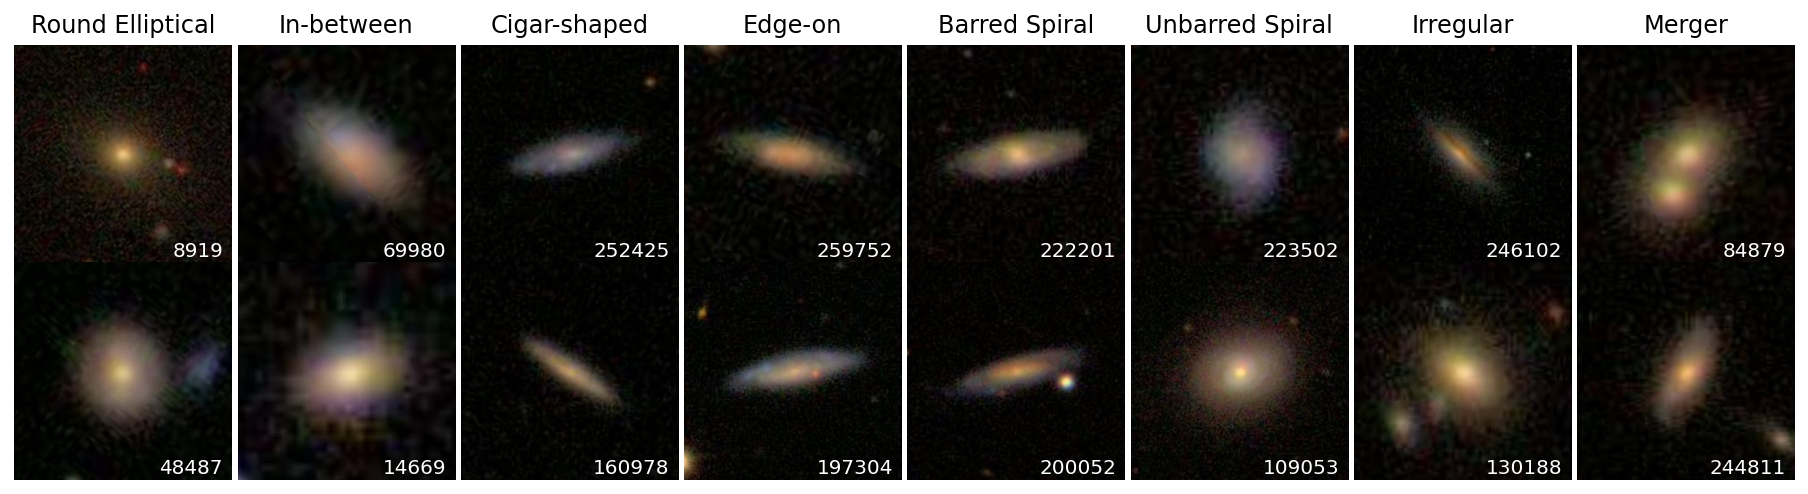

In [7]:
show_example_galaxy_class_images(df, nrows=2, label_tag='label_8')

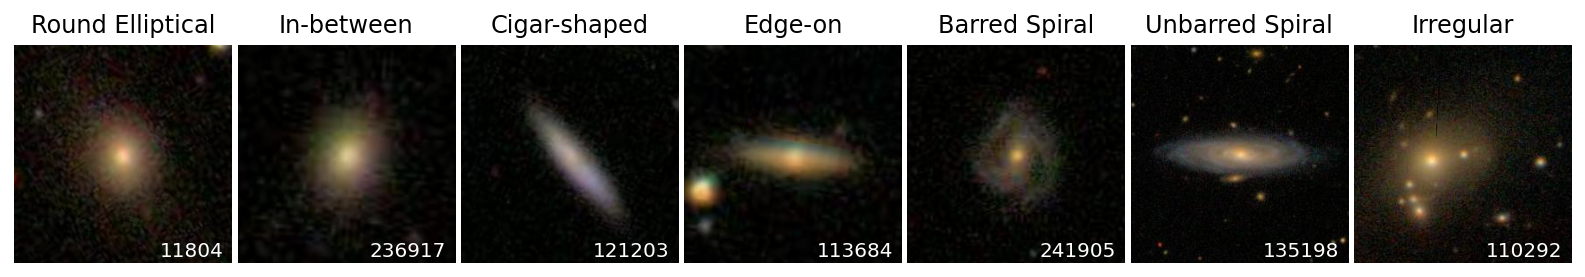

In [8]:
show_example_galaxy_class_images(df, nrows=1, label_tag='label_7')

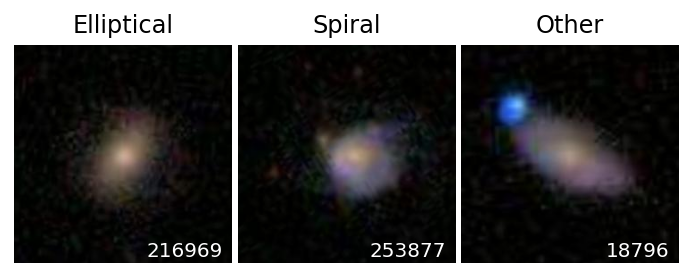

In [9]:
show_example_galaxy_class_images(df, nrows=1, label_tag='label_3')

### Selected galaxy morphology examples

In [10]:
selected_display_galaxyID = {
    0 : [243021, 111880],
    1 : [30598, 101116, 153180, 20907], 
    2 : [289775, 134298, 122154],
    3 : [156120, 40827, 229057],
    4 : [10960, 277467, 82168],
    5 : [210994, 117240, 269912, 63748],
    6 : [120732, 141914, 259134, 271664],
    7 : [83054, 270497, 221654, 247077],
}

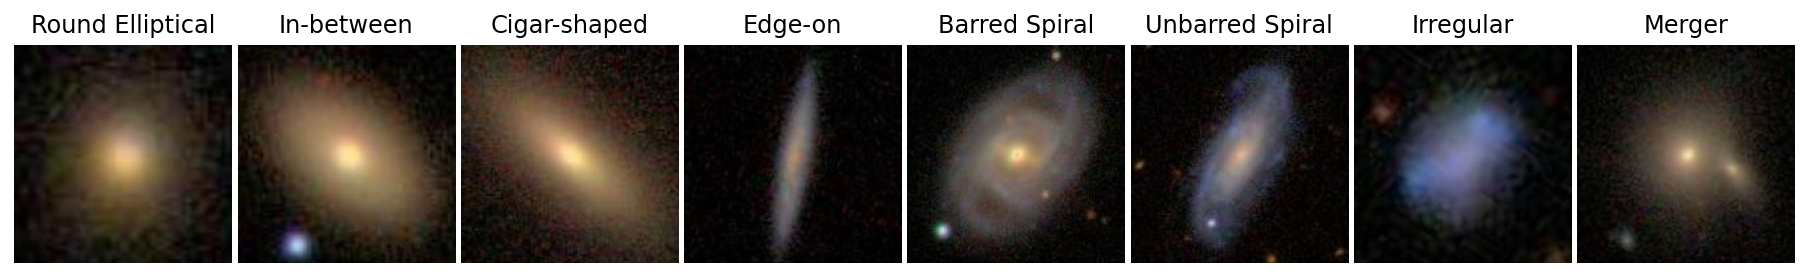

In [11]:
# --- parameters ---
edge_pixel_cut = 130
# ------------------

start = edge_pixel_cut
end = 424-edge_pixel_cut

fig, axes = plt.subplots(1, 8, figsize=(16, 2))
plt.subplots_adjust(hspace=0.001, wspace=0.001)

for classID in range(8):
    axes[classID].set_title(label_info['label_8'][classID])

    galID = selected_display_galaxyID[classID][0]
    IMG = plt.imread(dir_image+f'/{galID}.jpg')
    axes[classID].imshow(IMG[start:end,start:end,:])

for i, ax in enumerate(axes.flat):
    ax.axis('off')
    
#plt.tight_layout()
#fig.savefig('galaxy_types2.pdf')